In [1]:
# import library yang dibutuhkan
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [7]:
categories = ['Cars', 'Ice cream cone', 'Cricket ball']

flat_data_arr=[]
target_arr=[]
datadir='E:\Ripki Alfinnur\Belajar_Ai\KMMI\Klasifikasi Citra\Dataset Image Classfication'

for i in categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(categories.index(i))
  print(f'loaded category:{i} selesai')

flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Cars
loaded category:Cars selesai
loading... category : Ice cream cone
loaded category:Ice cream cone selesai
loading... category : Cricket ball
loaded category:Cricket ball selesai


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
1,0.717647,0.717647,0.717647,0.721569,0.721569,0.721569,0.723582,0.723582,0.723582,0.725490,...,0.338209,0.320562,0.308797,0.337255,0.317647,0.305882,0.335346,0.317647,0.305882,0
2,0.184641,0.170915,0.162092,0.263725,0.237255,0.174510,0.286275,0.243137,0.173203,0.286275,...,0.592157,0.596078,0.603922,0.601961,0.605882,0.615686,0.583660,0.587582,0.607190,0
3,0.760784,0.690196,0.611765,0.752941,0.686275,0.607843,0.756863,0.690196,0.611765,0.749020,...,0.427451,0.462745,0.450980,0.427451,0.463503,0.458824,0.427451,0.466667,0.470588,0
4,0.260850,0.264771,0.276536,0.279477,0.271239,0.275556,0.114641,0.102876,0.099374,0.062745,...,0.537255,0.511438,0.505882,0.552941,0.533333,0.521569,0.533333,0.513725,0.507908,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
95,0.574510,0.658824,0.345098,0.574510,0.658824,0.343137,0.574510,0.658824,0.343137,0.574510,...,0.534641,0.584967,0.285621,0.563725,0.603922,0.308824,0.576471,0.605882,0.313725,2
96,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
97,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2


In [8]:
# membagi dataset menjadi data train dan data validasi
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=77,stratify=y)
print('Proses memisahkan data selesai')

Proses memisahkan data selesai


In [10]:
# proses cross validasi untuk mencari parameter terbaik
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],
            'kernel':['rbf','poly']}
            
svc=svm.SVC(probability=True)
print("Proses pelatihan model...")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('Selesai...')
model.best_params_

Proses pelatihan model...
Selesai...


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [13]:
# hasil prediksi data validasi
y_pred = model.predict(x_test)
print(f'Prediksi label : {y_pred}')
print(f'Ground Truth   : {np.array(y_test)}')
print(f'Akurasi model  : {accuracy_score(y_pred,y_test)*100}%')

Prediksi label : [0 0 2 2 0 2 1 2 0 1 2 2 0 1 2 0 0 2 1 1]
Ground Truth   : [0 0 2 2 0 1 1 2 0 1 2 2 0 1 2 0 0 0 1 1]
Akurasi model  : 90.0%


In [14]:
# menyimpan model yang telah dilatih
pickle.dump(model,open('img_model.p','wb'))
print(f'Model telah disimpan.')

Model telah disimpan.


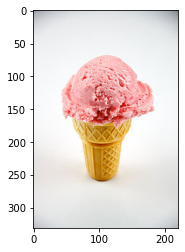

Cars = 2.139016420151775%
Ice cream cone = 92.69359006335131%
Cricket ball = 5.167393516496911%
Gambar tesebut merupakan : Ice cream cone


In [15]:
# menggunakan model untuk memprediksi label data lain
model = pickle.load(open('img_model.p','rb'))
img=imread('Strawberry_ice_cream_cone.jpg')
plt.imshow(img)
plt.show()

img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)

for ind,val in enumerate(categories):
  print(f'{val} = {probability[0][ind]*100}%')

print("Gambar tesebut merupakan : "+ categories[model.predict(l)[0]])